## **演示0901：SVM工作原理**

### **提出问题**
观察下列训练数据的二分类图：  
![](../images/090101.png)  
很明显，可以用一条直线分割Class1和Class2，并且利用该分界线，来判断新的数据点到底属于哪个类别。但是这样的分割线可以画出很多条：  
![](../images/090102.png)  
那么，那一条分界线是最合理的呢？

### **分析问题**
支持向量机(Support Vector Machine, SVM)通过寻找一个超平面来对样本进行分割；且分割线相对样本中的正例和反例均保持最大的间隔(margin)  
以2个Feature的训练数据(也就是平面上的二维坐标点)为例：  
![](../images/090103.png)  
* 超平面
 * 假设中间的蓝色实线H作为分割超平面(二维情况下其实是一条线)，两边的虚线H1超平面和H2超平面与H平行，并且经过离H最近的训练数据点
 * 位于H1和H2上的点，被称为支持向量(可能有多个)
* 超平面的数学表述
 * 对于二维数据点，可以使用公式$ a_1 x_1+a_2 x_2+b=0$ 来描述直线H。其中$x_1$是横坐标，$x_2$是纵坐标(为了表示Feature，这里特意不使用$y$作为纵坐标标记)
 * 设$x$是包含$(x_1, x_2)$的列向量，$w$是包含$(a_1, a_2)$的列向量，则H直线$a_1 x_1+a_2 x_2+b=0$ 又可以表示为：$w^T * x+b=0$
 * 在多维(超过二维)的情况下，$w^T * x+b=0$ 仍然是成立的。$w$向量的长度是维度数(Feature数)
 * 超平面H1所在直线：$w^T * x+b=1$，超平面H2所在直线：$w^T*x+b=-1$
 * 对于任意正样本$(y=+1)$，都应出现在H1的右边，也就是：$w^T * x+b \ge 1$；而对于任意负样本$(y =-1)$，都应出现在H2的左边，也就是：$w^T * x+b \le -1$
* SVM的优化目标
 * 超平面H1和H2之间的距离为：$m= \dfrac{2}{\sqrt{(w^T w)}}=\dfrac{2}{||w||}$ ，其中， $ ||w||=\sqrt{(w^T w)} $
 * 现在，要使得这两个超平面之间的距离最远，实际上就是要使得$||W||$最小。为了方便计算，一般设为使得 $\dfrac{||w||^2}{2}$ 最小
 * 另一方面，所有训练数据点，要么在H1的右边，要么在H2的左边(H1和H2之间不能有数据点)，即：$ y * (w^T * x+b) \ge 1$其中，$y$表示样本的分类结果(+1或-1)
 * 最终得到SVM的优化目标及限制条件如下：  
$ \left\{\begin{aligned}
target: & min(\frac{||w||^2}{2}) &\\
s.t.: & 1 - y^{(i)} * (w^T * x^{(i)} + b) \le 0 &
\end{aligned}\right. $
   * $m$是样本的个数
   * $x^{(i)}$ 是第$i$个样本的Feature向量
   * $y^{(i)}$ 是第$i$个样本的分类结果(+1或-1)
 * 上述可以使用凸优化来进行求解，以得出最优的$w$和$b$，从而得到判别式$h(x)=w^T * x+b$
* 使用SVM进行预测
 * 给定待预测的Feature向量$x_t$，采用下列方法：$h(x_t)=sign(w^T * x_t+b)$。其中$sign$表示取符号。
 * 如果$w^T * x_t+b \gt 0$，则返回+1
 * 如果$w^T * x_t+b \lt 0$，则返回-1

### **案例1：使用sklearn.svm**

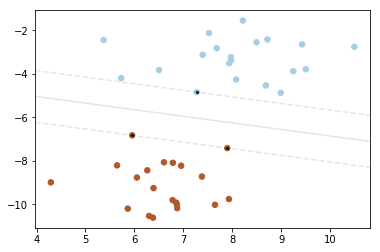

In [10]:
''' 使用svm对一组随机二维数据点分类 '''

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# 以高斯分布生成40个随机二维数据点
# centers=2表示，这些数据点围绕两个中心点聚集
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

clf = svm.SVC(kernel='linear')              # 采用线性内核(这些数据点线性可分)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# 绘制分割函数线
ax = plt.gca()
xlim = ax.get_xlim()                        # 获取水平方向坐标轴的范围
ylim = ax.get_ylim()                        # 获取数值方向坐标轴的范围

# 创建一批网格节点坐标
xx = np.linspace(xlim[0], xlim[1], 30)      # 水平方向30个节点
yy = np.linspace(ylim[0], ylim[1], 30)      # 数值方向30个节点
YY, XX = np.meshgrid(yy, xx)
# xy：900x2
xy = np.vstack([XX.ravel(), YY.ravel()]).T   # 第一列为所有的x坐标，第二列为对应的y轴坐标
# 根据x、y坐标，根据判别函数，计算出对应的Z值
Z = clf.decision_function(xy).reshape(XX.shape)  # Z: 900x2

# 绘制决策边界线
# 作等高线图，但只显示判别结果(Z值)为-1,0,1的等高线点，也就是决策分割线以及左右两边的分界线
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.1, linestyles=['--', '-', '--'])

# 标记出支持向量点
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=1, linewidth=2, facecolors='black')
plt.show()

### **SVM与凸优化**
* SVM优化原问题
$ \left\{\begin{aligned}
target: & min(\frac{||w||^2}{2}) &\\
s.t.: & 1 - y^{(i)} * (w^T * x^{(i)} + b) \le 0 , (i=0,1,\cdots,m)&
\end{aligned}\right. $  
这是典型的凸优化问题，可以使用scipy.optimize.minimize来求最优解。但是，转换为**对偶问题**后，将更容易引入核函数以解决线性不可分的问题。
* 拉格朗日对偶问题
$\left\{\begin{aligned}
target: & {max \atop {\alpha, b}} \{ \sum_{i=1}^m \alpha_i - \dfrac{1}{2} \sum_{i=1}^m (\alpha_i y^{(i)}) * \sum_{j=1}^m [\alpha_j y^{(j)} (x^{(i)})^T x^{(j)}] \} \\ \\
s.t.: & \left\{\begin{aligned}
\alpha_i \ge 0 \\
\sum_{i=0}^m \alpha_i y^{(i)} = 0
\end{aligned}\right.
\end{aligned}\right. $  
 * 求解上述对偶问题(其实是典型的Quadratic Programming，或者QP问题)，得到$\alpha$的最优解。
 * scipy.optimize.minimize方法提供了针对上述问题的求解器
 * 根据条件式(1)：$ w=\sum_{i=1}^m \alpha_i y^{(i)} x^{(i)} $ 得到$w$的最优解
 * 求解最优的$b$值
    * 最优的$b$值，就是分割超平面所在的$b$值。从SVM的基本工作原理图中可以看出，它位于$y=-1$和$y=1$两个超平面的正中间。
    * 设$w^T * x_p+b=1$代表$y=1$的超平面，$w^T * x_n+b=-1$代表$y=-1$的超平面；很显然，$x_p$ 和$x_n$ 正好都是支持向量
    * 根据SVM超平面分界图，可知：所有$y>1$的样本点$x$，都满足：$w^T*x \gt w^T * x_p$；所有$y \lt -1$的样本点$x$，都满足：$w^T* x \lt w^T * x_p$
    * 因此，$x_p$就是所有$y=1$的样本中，$w^T*x$最小的样本点；而$x_n$就是所有$y=-1$的样本中，$w^T*x$最大的样本点。可以通过分别计算$y=1$和$y=-1$的所有样本而找到$x_p$和$x_n$(这些点就是支持向量)
    * 最后计算最优的$b$值： $b=\dfrac{-(w^T*x_p+ w^T*x_n)}{2} $
* 关于SVM优化的原问题与拉格朗日对偶问题的等价性以及推导过程，本例不再赘述